# Recommender Systems 

Recommender systems can be best explained with an example. while shopping online at Amazon, we might have noticed suggested items or other users recently purchased? Those are Recommender systems by Amazon.

It is a basic recommendation system by suggesting items that are most similar to a particular item. In this notebook, we use the famous dataset called movielens. From this data, we try to explore what movies/items that are most similar to an individuals' movie choice.

Two most common types of recommender systems are **Content-Based** and **Collaborative Filtering (CF)**. 

* Collaborative filtering produces recommendations based on the knowledge of users’ attitude to items, that is it uses the "wisdom of the crowd" to recommend items. 
* Content-based recommender systems focus on the attributes of the items and give you recommendations based on the similarity between them.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [3]:
df = pd.read_csv('u.data.csv')

In [16]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [14]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data.csv', sep='\t', names=column_names)

In [15]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [18]:
# Another dataset

movie_titles = pd.read_csv("Movie_Id_Titles.csv")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [19]:
# Merging both data on 'item_id' column which is common in both.

df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## EDA

A ratings dataframe with average rating and number of ratings:

In [20]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [21]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [22]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [23]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


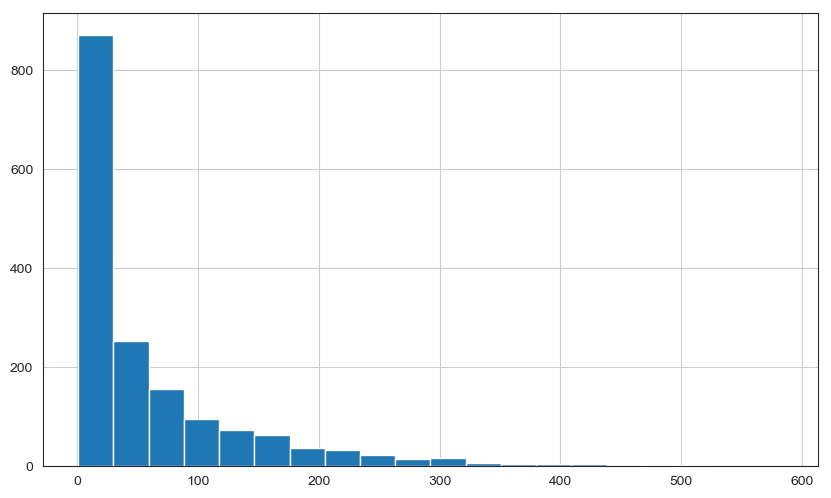

In [33]:
plt.figure(figsize=(10,6),dpi=100)
ratings['num of ratings'].hist(bins=20)

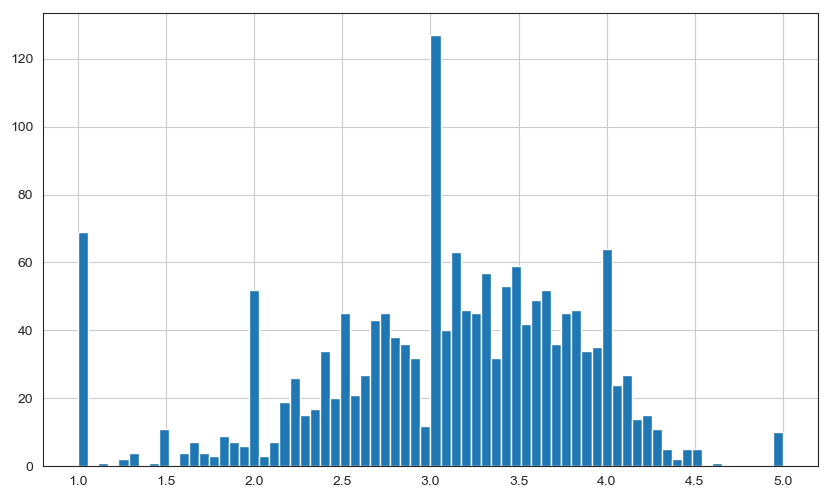

In [36]:
plt.figure(figsize=(10,6),dpi=100)
ratings['rating'].hist(bins=70)

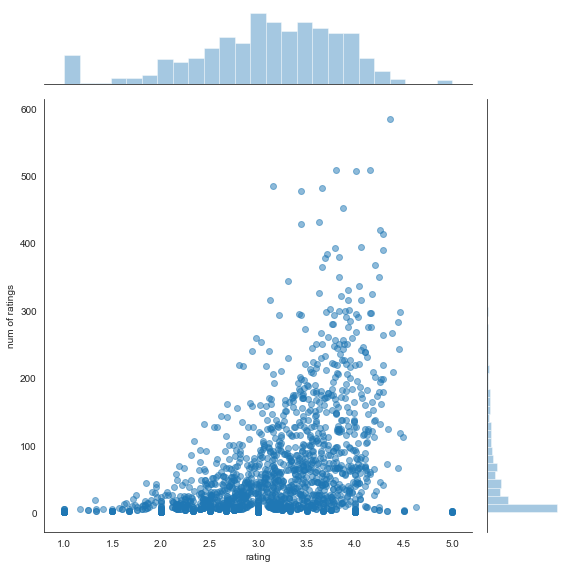

In [40]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5,height=8)

## Recommending Similar Movies 

We need to create a matrix that has the user ids on one axis and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. There will be a lot of NaN values, because most people have not seen the movies or not rated them.

In [41]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movies based on Count of num of ratings

In [46]:
ratings.sort_values('num of ratings',ascending=False).head(20)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [45]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [50]:
pulpfiction_user_ratings = moviemat['Pulp Fiction (1994)']
toystory_user_ratings = moviemat['Toy Story (1995)']
contact_user_ratings = moviemat['Contact (1997)']
toystory_user_ratings.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

In [51]:
contact_user_ratings.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

We use corrwith( ) method to get correlations between pandas series:

In [60]:
similar_to_pulpfiction = moviemat.corrwith(pulpfiction_user_ratings)
similar_to_contact = moviemat.corrwith(contact_user_ratings)

clean this by removing NaN values and using a DataFrame instead of a series:

In [54]:
corr_pulpfiction = pd.DataFrame(similar_to_pulpfiction,columns=['Correlation'])
corr_pulpfiction.dropna(inplace=True)
corr_pulpfiction.head()

,Correlation
title,
'Til There Was You (1997),-0.071429
1-900 (1994),0.755929
101 Dalmatians (1996),0.045124
12 Angry Men (1957),0.051940
187 (1997),-0.240381


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched pulp fiction. 

In [55]:
corr_pulpfiction.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
The Innocent (1994),1.0
Talking About Sex (1994),1.0
Pulp Fiction (1994),1.0
Crossfire (1947),1.0
Tough and Deadly (1995),1.0
8 Seconds (1994),1.0
My Favorite Season (1993),1.0
Maya Lin: A Strong Clear Vision (1994),1.0
Daniel Defoe's Robinson Crusoe (1996),1.0


We can fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [56]:
corr_pulpfiction = corr_pulpfiction.join(ratings['num of ratings'])
corr_pulpfiction.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),-0.071429,9
1-900 (1994),0.755929,5
101 Dalmatians (1996),0.045124,109
12 Angry Men (1957),0.051940,125
187 (1997),-0.240381,41


In [57]:
corr_pulpfiction[corr_pulpfiction['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,394
"Cable Guy, The (1996)",0.472482,106
Trainspotting (1996),0.451906,250
True Romance (1993),0.416478,104
"People vs. Larry Flynt, The (1996)",0.404107,215


In [58]:
corr_contact = pd.DataFrame(similar_to_contact,columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact = corr_contact.join(ratings['num of ratings'])
corr_contact[corr_contact['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
